In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("/Users/bentonwang/My_Documents/NSS_Projects/un-exploration-MultidisciplinaryDeepDives/data/gdp_per_capita.csv")

In [3]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value": "GDP_Per_Capita"})
gdp_df = gdp_df.drop(columns='Value Footnotes')

7176 rows, 3 columns

In [4]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [5]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [6]:
gdp_df.nunique()

Country            242
Year                31
GDP_Per_Capita    7120
dtype: int64

In [7]:
year_series = gdp_df['Year'].squeeze()
pd.unique(pd.Series(year_series))

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [8]:
gdp_df.groupby("Year").size()

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
dtype: int64

## Q8: 242-1 = 241 countries & regions  

In [9]:
country_series = gdp_df['Country'].squeeze()
pd.unique(pd.Series(country_series))

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czech Republic',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high inco

In [10]:
gdp_df.groupby("Country").size()

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Length: 242, dtype: int64

In [11]:
gdp_df_sorted_by_country_rep = gdp_df.groupby(['Country'])['Year'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)
gdp_df_sorted_by_country_rep.head(20)

,Country,Count
197,Somalia,8
53,Djibouti,8
225,Turks and Caicos Islands,10
192,Sint Maarten (Dutch part),10
112,Kosovo,13
36,Cayman Islands,15
154,Nauru,17
0,Afghanistan,19
213,SÃ£o TomÃ© and Principe,20
219,Timor-Leste,21


## Q8: Least represented countries: Somalia and Djibouti (8 each). Likely because of how difficult it is to work in these countries (i.e. to gather data) when armed conflicts abound.

In [12]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]
gdp_2014

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472
...,...,...,...
7031,Vietnam,2014,7601.858491
7062,West Bank and Gaza,2014,5967.073437
7089,World,2014,15224.439424
7120,Zambia,2014,3450.037600


 ## Q9 - see above

In [13]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


## Q10 - see above

In [14]:
GDP_Per_Capita_series = gdp_df['GDP_Per_Capita'].squeeze()

(array([3.591e+03, 1.610e+03, 5.230e+02, 5.590e+02, 4.340e+02, 1.980e+02,
        9.500e+01, 5.000e+01, 4.000e+01, 3.700e+01, 1.300e+01, 1.800e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <BarContainer object of 16 artists>)

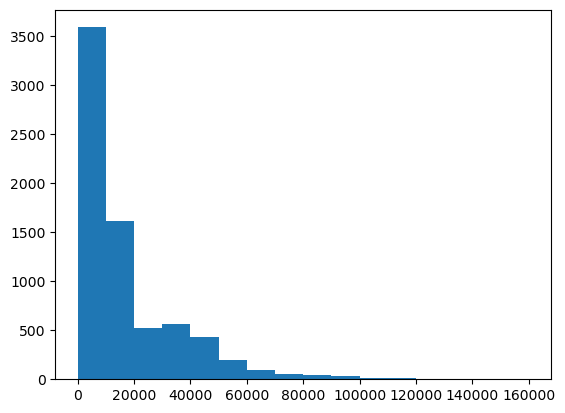

In [15]:
plt.hist(GDP_Per_Capita_series, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])
# plt.hist(gdp_2014['GDP_Per_Capita], np.arrange(0,170000,10000));

## Q11: right skewed

In [16]:
gdp_2018 = gdp_df[gdp_df['Year']==2018] 
gdp_2018_SortedBy_GDP_Per_Capita = gdp_2018.sort_values('GDP_Per_Capita')
gdp_2018_SortedBy_GDP_Per_Capita

,Country,Year,GDP_Per_Capita
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348
...,...,...,...
3073,Ireland,2018,83726.362961
5383,Qatar,2018,90970.060902
5722,Singapore,2018,98336.956494
3884,Luxembourg,2018,115049.926079


## Q12 - see above

In [17]:
gdp_df_1990_2018 = gdp_df[(gdp_df['Year']==1990) | (gdp_df['Year']==2018)] 
gdp_df_1990_2018_pivoted = pd.pivot_table(gdp_df_1990_2018, values='GDP_Per_Capita', index=['Country'], columns=['Year'], dropna = True)
gdp_df_1990_2018_pivoted_no_NA =  gdp_df_1990_2018_pivoted.dropna()

gdp_pivoted = gdp_df_1990_2018_pivoted_no_NA
gdp_pivoted


# gdp_pivoted = gdp_pivoted_All_Yrs.loc[:, [1990, 2018]]
# gdp_pivoted

Year,1990,2018
Country,,
Africa Eastern and Southern,3083.976800,3697.317275
Africa Western and Central,2810.341129,4132.592996
Albania,4827.034551,13317.092313
Algeria,8746.340762,11630.679409
Angola,5758.950488,6982.129420
...,...,...
Vanuatu,2855.554643,3093.086718
Vietnam,2066.372215,9548.700016
World,9704.621768,16679.316815


## Q13 - see above

In [18]:
gdp_pivoted.columns

Int64Index([1990, 2018], dtype='int64', name='Year')

In [19]:
gdp_df.head

<bound method NDFrame.head of           Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]>

In [20]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2018] - gdp_pivoted[1990])/(gdp_pivoted[1990]) 

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gp/T/ipykernel_2660/553308676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2018] - gdp_pivoted[1990])/(gdp_pivoted[1990])


In [21]:
gdp_pivoted

Year,1990,2018,Percent_Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092313,175.885581
Algeria,8746.340762,11630.679409,32.977661
Angola,5758.950488,6982.129420,21.239615
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Vietnam,2066.372215,9548.700016,362.099710
World,9704.621768,16679.316815,71.869829


In [22]:
gdp_pivoted_SortedBy_Percent_Change = gdp_pivoted.sort_values('Percent_Change')
gdp_pivoted_SortedBy_Percent_Change.head(20)

Year,1990,2018,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1085.893688,-40.326440
United Arab Emirates,111454.055665,66968.221181,-39.914056
Burundi,1184.842032,761.524143,-35.727791
Ukraine,16428.480469,12336.926758,-24.905247
Congo,5068.286948,3928.427999,-22.490024
Central African Republic,1201.674665,933.109951,-22.349203
Gabon,18179.170002,14743.698243,-18.897847
Tajikistan,4092.148779,3415.299465,-16.540193
Brunei,71232.789430,60389.184647,-15.222772


## Q15:    17 countries experienced a negative percent change in GDP per capita from 1990 to 2018

In [23]:
gdp_pivoted_SortedBy_Percent_Change = gdp_pivoted.sort_values('Percent_Change')
gdp_pivoted_SortedBy_Percent_Change.tail(2)

Year,1990,2018,Percent_Change
Country,,,
China,1423.896348,15133.995618,962.857956
Equatorial Guinea,1039.985049,20386.013868,1860.221820


## Q16: Equatorial Guinea has the highest % change in GDP per capita. China has the 2nd highest % change in GDP per capita.

<Axes: xlabel='Year'>

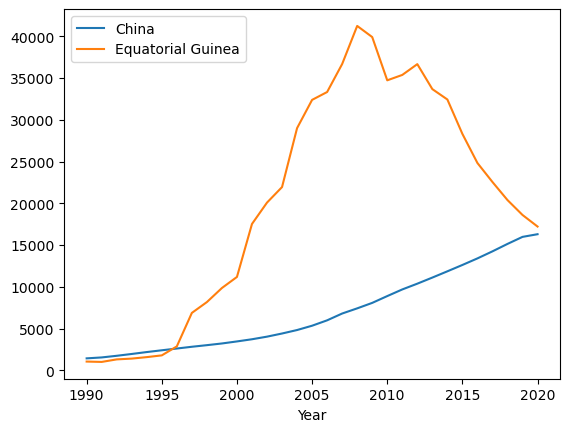

In [24]:
two_lines_largest_changes = gdp_pivoted_SortedBy_Percent_Change.tail(2)


# axes = plt.gca()

# year_series = gdp_df['Year'].squeeze()
# country_series = gdp_df['Country'].squeeze()

# lines_plot = {'x' : year_series,
         #    'y' : country_series}
# lines_plot.show()
gdp_df

##                                  ==
axis = gdp_df.loc[gdp_df['Country'].isin(['China'])].plot(kind='line', x='Year', y='GDP_Per_Capita', label = 'China')
##                            ==
gdp_df.loc[gdp_df['Country'].isin(['Equatorial Guinea'])].plot(kind='line', x='Year', y='GDP_Per_Capita', ax = axis, label = 'Equatorial Guinea')

# Q17: 

In [25]:
continents = pd.read_csv("/Users/bentonwang/My_Documents/NSS_Projects/un-exploration-MultidisciplinaryDeepDives/data/continents.csv")

# Q18: here I am using the variable gdp_df_joined instead of gdp_df

In [26]:
gdp_df_joined = gdp_df.merge(continents, on='Country', how='inner')

In [27]:
countries_per_continent = gdp_df_joined.groupby('Continent')['Country'].nunique()
countries_per_continent

Continent
Africa           50
Asia             42
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

In [2]:
countries_per_continent.plot.bar()



# if there are duplicates, then use the following functions: 

# merged_gdp_cont = gdp_df.drop_duplicates(subset = 'Country')['Continent'].value_counts()
# merged_gdp_cont.plot(kind='bar')

# plt.xlabel('Continent Name')
# plt.ylabel('Number of Continents')
# plt.title('Countries per Continents')

NameError: name 'countries_per_continent' is not defined

# Q19 - see above
# Q20: ???

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

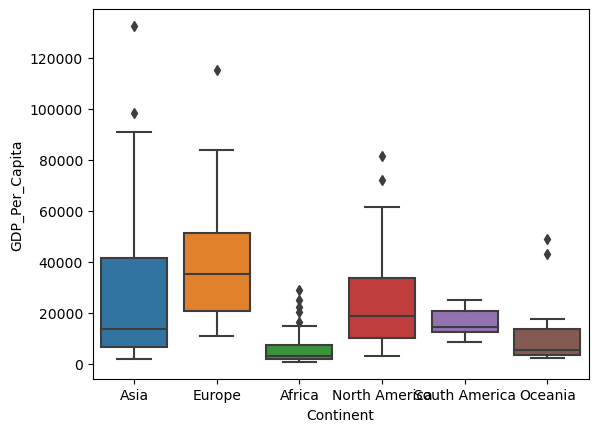

In [29]:
gdp_df_joined_GroupBy_Continent = gdp_df_joined.groupby('Continent')

gdp_df_joined

sns.boxplot(data = gdp_df_joined.loc[gdp_df_joined['Year']==2018], x='Continent', y='GDP_Per_Capita')


# gdp_df_joined.loc[gdp_df_joined['Year']==2018].plot(kind='box', x='Continent', y='GDP_Per_Capita')


# Q21: 

In [30]:
life_expectancy = pd.read_csv("/Users/bentonwang/My_Documents/NSS_Projects/un-exploration-MultidisciplinaryDeepDives/data/life_expectancy_WorldBank.csv", skiprows=4)
life_expectancy.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN
5,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,54.439000,55.634000,56.671000,57.844000,58.983000,60.019000,...,78.407000,78.644000,78.860000,79.047000,79.184000,79.282000,76.989000,76.463000,NaN,NaN
6,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.972899,45.676401,46.122576,46.972472,47.895758,48.232107,...,70.492629,70.758222,70.943062,71.429596,71.633017,71.844626,70.923360,70.814483,NaN,NaN
8,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.811000,49.695000,50.686000,51.584000,52.848000,53.985000,...,79.044000,79.223000,79.335000,79.504000,79.627000,79.726000,78.946000,78.710000,NaN,NaN
9,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,63.978000,64.360000,64.244000,64.449000,64.363000,64.593000,...,76.755000,76.760000,76.308000,76.833000,76.999000,77.284000,75.892000,75.390000,NaN,NaN


# Q22:  

In [31]:
# life_expectancy_after_column_drop = life_expectancy.drop(life_expectancy.iloc[:, 1:4], inplace=False, axis=1)

life_expectancy_after_column_drop = life_expectancy.drop(['Country Code', 'Indicator Name' , 'Indicator Code', '2022', 'Unnamed: 67'], inplace=False, axis=1)

 
type(life_expectancy_after_column_drop)

life_expectancy_after_column_drop

#life_expectancy_after_column_drop.index

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,60.050780,60.709870,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,63.323000,63.653000,63.935000,...,78.280000,78.587000,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,36.097000,36.866000,37.796000,...,67.343000,67.545000,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,54.391000,54.626000,54.876000,...,61.846000,62.533000,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,50.679000,50.802000,50.856000,...,58.867000,59.878000,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000


In [32]:
life_expectancy_after_melt = pd.melt(life_expectancy_after_column_drop, id_vars=['Country Name'])
life_expectancy_after_melt 
 


,Country Name,variable,value
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16487,Kosovo,2021,76.806000
16488,"Yemen, Rep.",2021,63.753000
16489,South Africa,2021,62.341000
16490,Zambia,2021,61.223000


In [33]:
life_expectancy_after_melt_rename = life_expectancy_after_melt.rename(columns = {"Country Name": "Country", "variable": "Year", "value": "Life_Expectancy"})
life_expectancy_after_melt_rename

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16487,Kosovo,2021,76.806000
16488,"Yemen, Rep.",2021,63.753000
16489,South Africa,2021,62.341000
16490,Zambia,2021,61.223000


# Q23:  Japan is the first country with a life expectancy to exceed 80

In [34]:
life_expectancy_above80_cutoff = life_expectancy_after_melt_rename.loc[life_expectancy_after_melt_rename['Life_Expectancy']>80]
life_expectancy_above80_cutoff_sorted = life_expectancy_above80_cutoff.groupby(['Year'])    #['Country'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)
life_expectancy_above80_cutoff_sorted.head(10)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16264,Channel Islands,2021,81.232000
16279,Cyprus,2021,81.203000
16281,Germany,2021,80.900976
16284,Denmark,2021,81.404878


# Q24: 

In [35]:
gdp_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


In [36]:
life_expectancy_above80_cutoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 9695 to 16482
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          653 non-null    object 
 1   Year             653 non-null    object 
 2   Life_Expectancy  653 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.4+ KB


In [37]:
life_expectancy_above80_cutoff['Year'] = pd.to_numeric(life_expectancy_above80_cutoff['Year'])
life_expectancy_above80_cutoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 9695 to 16482
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          653 non-null    object 
 1   Year             653 non-null    int64  
 2   Life_Expectancy  653 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.4+ KB


/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gp/T/ipykernel_2660/3445038843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy_above80_cutoff['Year'] = pd.to_numeric(life_expectancy_above80_cutoff['Year'])


In [38]:
gdp_le = gdp_df.merge(life_expectancy_above80_cutoff, on=['Country','Year'], how='outer')
gdp_le.tail(5)

,Country,Year,GDP_Per_Capita,Life_Expectancy
7315,Portugal,2021,NaN,81.073171
7316,Singapore,2021,NaN,83.441463
7317,Slovenia,2021,NaN,80.875610
7318,Sweden,2021,NaN,83.156098
7319,Virgin Islands (U.S.),2021,NaN,80.068293


# Q25:   47 countries

In [39]:
gdp_le_2019_Above80 = gdp_le.loc[((gdp_le['Year']==2019) & (gdp_le['Life_Expectancy']>80))]
gdp_le_2019_Above80



,Country,Year,GDP_Per_Capita,Life_Expectancy
330,Australia,2019,49309.112399,82.900000
361,Austria,2019,55833.559904,81.895122
423,Bahrain,2019,45311.868303,80.019000
547,Belgium,2019,51937.423609,81.995122
640,Bermuda,2019,81681.726668,81.033000
1067,Canada,2019,49171.511086,82.228780
1230,Chile,2019,24931.121881,80.326000
1463,Cyprus,2019,41521.921875,81.397000
1556,Denmark,2019,57161.686389,81.451220
1993,Euro area,2019,47043.049433,82.327756


In [40]:
gdp_le_2019 = gdp_le.loc[(gdp_le['Year']==2019)]
gdp_le_2019

,Country,Year,GDP_Per_Capita,Life_Expectancy
1,Afghanistan,2019,2065.036235,NaN
20,Africa Eastern and Southern,2019,3684.315172,NaN
51,Africa Western and Central,2019,4159.844650,NaN
82,Albania,2019,13653.201570,NaN
113,Algeria,2019,11521.984210,NaN
...,...,...,...,...
7267,Isle of Man,2019,NaN,80.737000
7268,"Korea, Rep.",2019,NaN,83.226829
7269,Liechtenstein,2019,NaN,84.160976
7270,New Caledonia,2019,NaN,80.419707


In [41]:
gdp_le_2019_top = gdp_le_2019.sort_values(by='GDP_Per_Capita', ascending=False)
gdp_le_2019_top3 = gdp_le_2019_top.head(3)
gdp_le_2019_top3

,Country,Year,GDP_Per_Capita,Life_Expectancy
3914,"Macao SAR, China",2019,127272.548511,84.978000
3883,Luxembourg,2019,116518.276815,82.639024
5721,Singapore,2019,98283.308908,83.595122


In [42]:
#life_expectancy_above80_cutoff = life_expectancy_after_melt_rename.loc[life_expectancy_after_melt_rename['Life_Expectancy']>80]

# Countries_LE_Above_80 = gdp_le_2019.loc[gdp_le_2019['Life_Expectancy']>80]
# Countries_LE_Above_80

No_of_Countries_LE_Above_80 = gdp_le_2019_Above80.groupby('Country')['Country'].nunique()
Count_No_of_Countries_LE_Above_80 = pd.value_counts(No_of_Countries_LE_Above_80)
Count_No_of_Countries_LE_Above_80

1    47
Name: Country, dtype: int64

# Q26:

In [43]:
gdp_le_2019_top3 

# gdp_le_2019_sorted = gdp_le_2019.groupby(['Country'])['GDP_Per_Capita'].count().reset_index(name='GDP_Per_Capita').sort_values(['GDP_Per_Capita'], ascending=True)
# Three_Largest_GDP_Per_Capita_2019 = gdp_le_2019_sorted.tail(3)
# Three_Largest_GDP_Per_Capita_2019

,Country,Year,GDP_Per_Capita,Life_Expectancy
3914,"Macao SAR, China",2019,127272.548511,84.978000
3883,Luxembourg,2019,116518.276815,82.639024
5721,Singapore,2019,98283.308908,83.595122


In [44]:
# gdp_le_2019_top3 = sns.load_dataset("gdp_le_2019_top3")

Top_3_Countries = list(set(gdp_le_2019_top3["Country"]))  #list(set(df['a'])
Top_3_Countries

['Singapore', 'Macao SAR, China', 'Luxembourg']

In [45]:
gdp_le_top3 = gdp_le.loc[gdp_le['Country'].isin(Top_3_Countries)]  #.plot(kind='line', x='Year', y='GDP_Per_Capita', ax = axis, label = 'Equatorial Guinea')
# since Top_3_Countries already is a list, no [] is needed around it

gdp_le_top3 

,Country,Year,GDP_Per_Capita,Life_Expectancy
3882,Luxembourg,2020,112557.309472,82.143902
3883,Luxembourg,2019,116518.276815,82.639024
3884,Luxembourg,2018,115049.926079,82.295122
3885,Luxembourg,2017,114985.842236,82.095122
3886,Luxembourg,2016,116283.699681,82.685366
...,...,...,...,...
5749,Singapore,1991,38667.750581,NaN
5750,Singapore,1990,37289.751704,NaN
7307,Luxembourg,2021,NaN,82.748780
7308,"Macao SAR, China",2021,NaN,85.399000


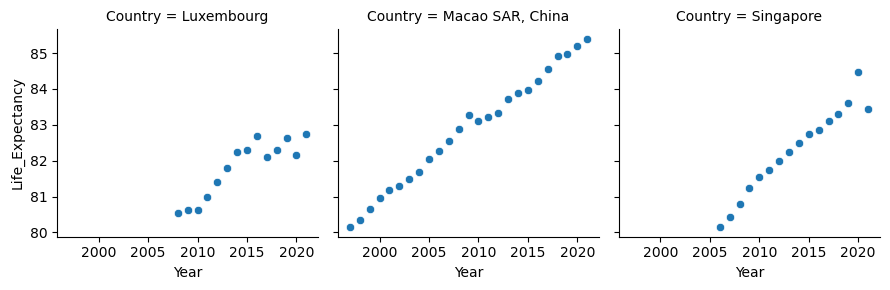

In [46]:
g = sns.FacetGrid(gdp_le_top3, col = "Country")  # col = gdp_le_2019_top3[["Country"]])
g.map_dataframe(sns.scatterplot, x="Year", y="Life_Expectancy")

# Q27:

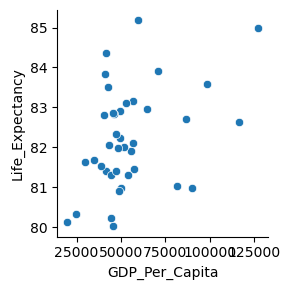

In [47]:
g = sns.FacetGrid(gdp_le_2019)  # col = gdp_le_2019_top3[["Country"]])
g.map_dataframe(sns.scatterplot, x="GDP_Per_Capita", y="Life_Expectancy")

# Q28:  r = 0.395  Life Expectancy and GDP Per Capita moderately correlate with each other 

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

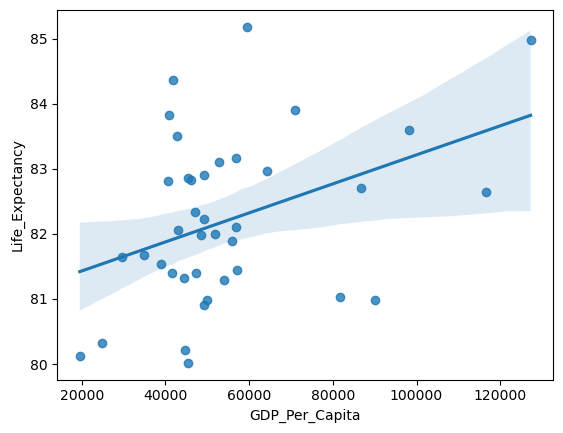

In [48]:
sns.regplot(x="GDP_Per_Capita", y="Life_Expectancy", data = gdp_le_2019)

In [49]:
gdp_le_2019['GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.39501192249779055

In [50]:
gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])

0.3950119224977906

# Q29:  r = 0.423 makes sense; exhibits a stronger correlation 

In [51]:
gdp_le_2019['Log_of_GDP_Per_Capita'] = np.log(gdp_le_2019.GDP_Per_Capita)
gdp_le_2019

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gp/T/ipykernel_2660/2371891593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['Log_of_GDP_Per_Capita'] = np.log(gdp_le_2019.GDP_Per_Capita)


,Country,Year,GDP_Per_Capita,Life_Expectancy,Log_of_GDP_Per_Capita
1,Afghanistan,2019,2065.036235,NaN,7.632903
20,Africa Eastern and Southern,2019,3684.315172,NaN,8.211840
51,Africa Western and Central,2019,4159.844650,NaN,8.333233
82,Albania,2019,13653.201570,NaN,9.521729
113,Algeria,2019,11521.984210,NaN,9.352012
...,...,...,...,...,...
7267,Isle of Man,2019,NaN,80.737000,NaN
7268,"Korea, Rep.",2019,NaN,83.226829,NaN
7269,Liechtenstein,2019,NaN,84.160976,NaN
7270,New Caledonia,2019,NaN,80.419707,NaN


In [52]:
gdp_le_2019['Log_of_GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.423027349892522

<Axes: xlabel='Log_of_GDP_Per_Capita', ylabel='Life_Expectancy'>

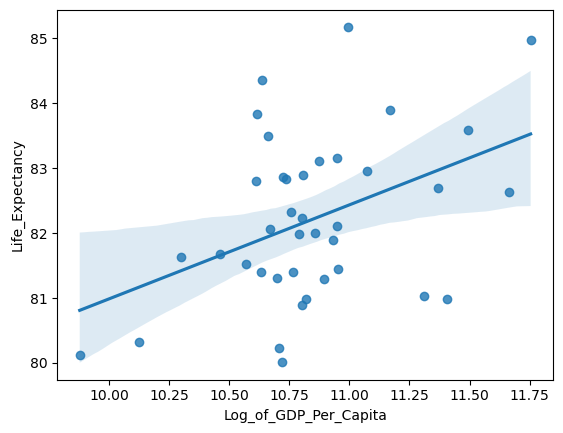

In [53]:
sns.regplot(x="Log_of_GDP_Per_Capita", y="Life_Expectancy", data = gdp_le_2019)

# Solo Exploration & Presentation: Exploring Correlation between National Expenditure on Public Education and Life Expectancy

In [54]:
edu_df = pd.read_csv("/Users/bentonwang/My_Documents/NSS_Projects/un-exploration-MultidisciplinaryDeepDives/data/Spending_on_Primary_School_Student.csv")

In [55]:
edu_df = edu_df.rename(columns = {"Reference Area": "Country", "Time Period":"Year", "Observation Value": "Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita"})
# edu_df = edu_df.drop(columns='Footnotes')
edu_df

,Country,Year,Sex,Age group,Units of measurement,Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita
0,Albania,2013,Not applicable,Not applicable,Percent,29.34387
1,Algeria,1999,Not applicable,Not applicable,Percent,12.24066
2,Algeria,2000,Not applicable,Not applicable,Percent,9.94408
3,Algeria,2002,Not applicable,Not applicable,Percent,11.03453
4,Algeria,2003,Not applicable,Not applicable,Percent,11.52180
...,...,...,...,...,...,...
1323,Viet Nam,2012,Not applicable,Not applicable,Percent,23.77934
1324,Yemen,2011,Not applicable,Not applicable,Percent,19.35831
1325,Zambia,2000,Not applicable,Not applicable,Percent,6.52583
1326,Zambia,2004,Not applicable,Not applicable,Percent,8.19350


In [56]:
life_expectancy_after_melt_rename['Year'] = pd.to_numeric(life_expectancy_after_melt_rename['Year'])
life_expectancy_after_melt_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16492 non-null  object 
 1   Year             16492 non-null  int64  
 2   Life_Expectancy  15866 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 386.7+ KB


In [57]:
edu_df['Year'] = pd.to_numeric(edu_df['Year'])    #.str[-4:])
edu_df.info()

# df1['Stateright'] = df1['State'].str[-2:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 6 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          1328 non-null   object 
 1   Year                                                                             1328 non-null   int64  
 2   Sex                                                                              1328 non-null   object 
 3   Age group                                                                        1328 non-null   object 
 4   Units of measurement                                                             1328 non-null   object 
 5   Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita  1328 non-null   float64
dtypes: float6

# extract rows that contain data on Public Expenditure on Education as Percent of GDP

In [58]:
# edu_percent_gdp = edu_df.loc[edu_df['Series'].isin(['Public expenditure on education (% of GDP)'])]
# edu_percent_gdp

In [59]:
edu_le = edu_df.merge(life_expectancy_after_melt_rename, on=['Country','Year'], how='outer')
edu_le.head(12)

,Country,Year,Sex,Age group,Units of measurement,Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita,Life_Expectancy
0,Albania,2013,Not applicable,Not applicable,Percent,29.34387,78.123
1,Algeria,1999,Not applicable,Not applicable,Percent,12.24066,70.032
2,Algeria,2000,Not applicable,Not applicable,Percent,9.94408,70.478
3,Algeria,2002,Not applicable,Not applicable,Percent,11.03453,71.230
4,Algeria,2003,Not applicable,Not applicable,Percent,11.52180,71.287
5,Andorra,2010,Not applicable,Not applicable,Percent,17.12489,NaN
6,Andorra,2002,Not applicable,Not applicable,Percent,7.96418,NaN
7,Andorra,2011,Not applicable,Not applicable,Percent,17.57438,NaN
8,Andorra,2004,Not applicable,Not applicable,Percent,8.24258,NaN
9,Andorra,2013,Not applicable,Not applicable,Percent,14.76933,NaN


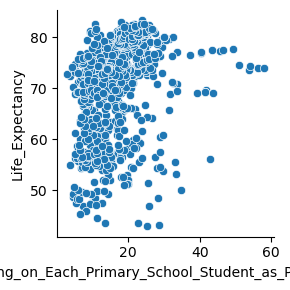

In [60]:
g = sns.FacetGrid(edu_le)  # col = gdp_le_2019_top3[["Country"]])
g.map_dataframe(sns.scatterplot, x="Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita", y="Life_Expectancy")

# Government Spending on Each Primary School Student as Percent of GDP Per Capita vs. Life Expectancy

# has the 2nd highest r-value

<Axes: xlabel='Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita', ylabel='Life_Expectancy'>

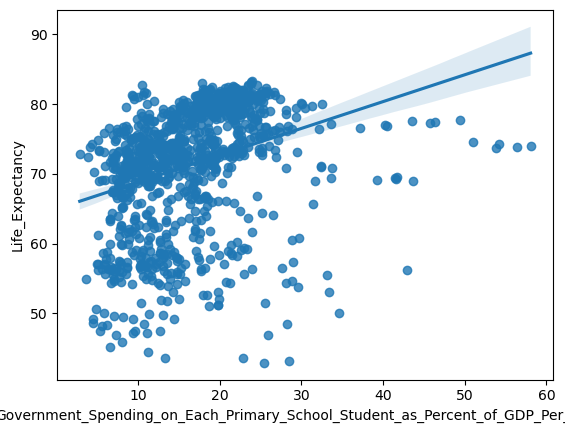

In [61]:
sns.regplot(x="Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita", y="Life_Expectancy", data = edu_le)

In [62]:
edu_le['Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita'].corr(edu_le['Life_Expectancy'])

0.3165184746229394

In [63]:
edu_le['Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita'] = np.log(edu_le.Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita)
edu_le

/Users/bentonwang/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Country,Year,Sex,Age group,Units of measurement,Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita,Life_Expectancy,Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita
0,Albania,2013,Not applicable,Not applicable,Percent,29.34387,78.123,3.379084
1,Algeria,1999,Not applicable,Not applicable,Percent,12.24066,70.032,2.504763
2,Algeria,2000,Not applicable,Not applicable,Percent,9.94408,70.478,2.296977
3,Algeria,2002,Not applicable,Not applicable,Percent,11.03453,71.230,2.401029
4,Algeria,2003,Not applicable,Not applicable,Percent,11.52180,71.287,2.444241
...,...,...,...,...,...,...,...,...
16712,Kosovo,2021,NaN,NaN,NaN,NaN,76.806,NaN
16713,"Yemen, Rep.",2021,NaN,NaN,NaN,NaN,63.753,NaN
16714,South Africa,2021,NaN,NaN,NaN,NaN,62.341,NaN
16715,Zambia,2021,NaN,NaN,NaN,NaN,61.223,NaN


# Log of Government Spending on Each Primary School Student as Percent of GDP Per Capita vs. Life Expectancy: 

# has the highest r-value

<Axes: xlabel='Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita', ylabel='Life_Expectancy'>

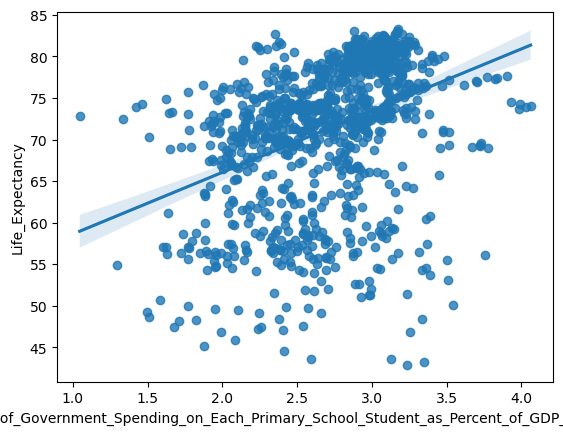

In [64]:
sns.regplot(x="Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita", y="Life_Expectancy", data = edu_le)

In [65]:
edu_le['Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita'].corr(edu_le['Life_Expectancy'])

0.3756466138914478

# Log of Government Spending on Each Primary School Student as Percent of GDP Per Capita vs. Log of Life Expectancy

In [66]:
edu_le['Log_of_Life_Expectancy'] = np.log(edu_le.Life_Expectancy)
edu_le

,Country,Year,Sex,Age group,Units of measurement,Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita,Life_Expectancy,Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita,Log_of_Life_Expectancy
0,Albania,2013,Not applicable,Not applicable,Percent,29.34387,78.123,3.379084,4.358285
1,Algeria,1999,Not applicable,Not applicable,Percent,12.24066,70.032,2.504763,4.248952
2,Algeria,2000,Not applicable,Not applicable,Percent,9.94408,70.478,2.296977,4.255301
3,Algeria,2002,Not applicable,Not applicable,Percent,11.03453,71.230,2.401029,4.265914
4,Algeria,2003,Not applicable,Not applicable,Percent,11.52180,71.287,2.444241,4.266714
...,...,...,...,...,...,...,...,...,...
16712,Kosovo,2021,NaN,NaN,NaN,NaN,76.806,NaN,4.341283
16713,"Yemen, Rep.",2021,NaN,NaN,NaN,NaN,63.753,NaN,4.155016
16714,South Africa,2021,NaN,NaN,NaN,NaN,62.341,NaN,4.132619
16715,Zambia,2021,NaN,NaN,NaN,NaN,61.223,NaN,4.114523


<Axes: xlabel='Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita', ylabel='Log_of_Life_Expectancy'>

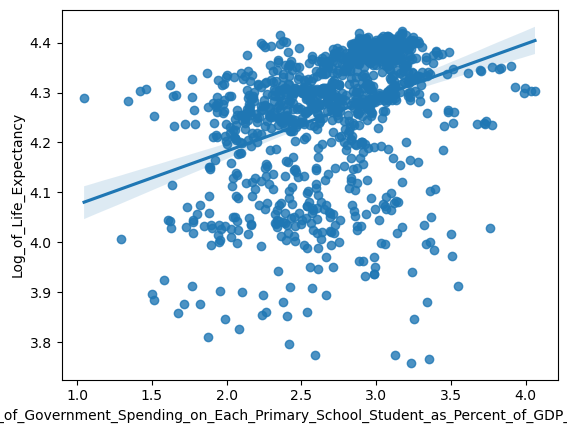

In [67]:
sns.regplot(x="Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita", y="Log_of_Life_Expectancy", data = edu_le)

In [68]:
edu_le['Log_of_Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita'].corr(edu_le['Log_of_Life_Expectancy'])

0.3577367948728962

# Government Spending on Each Primary School Student as Percent of GDP Per Capita vs. Log of Life Expectancy

<Axes: xlabel='Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita', ylabel='Log_of_Life_Expectancy'>

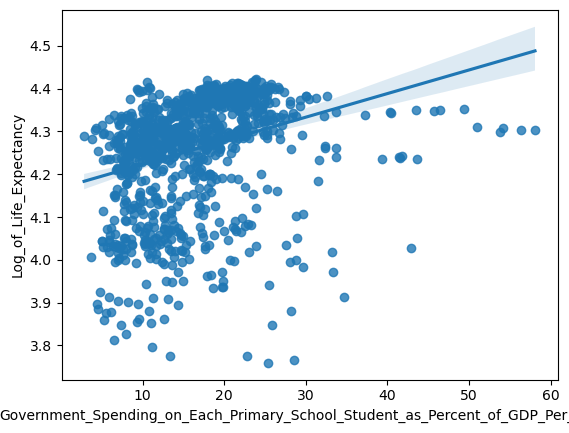

In [69]:
sns.regplot(x="Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita", y="Log_of_Life_Expectancy", data = edu_le)

In [70]:
edu_le['Government_Spending_on_Each_Primary_School_Student_as_Percent_of_GDP_Per_Capita'].corr(edu_le['Log_of_Life_Expectancy'])

0.2994734528933101